# Implementation of Random Forest

Random Forest is a collection of Decision Trees, i.e. *forest*, that have been generated using a *random* subset of data.

A Decision Tree is a step by step process to go through to decide a category something belongs to.

The creation of multiple trees with different samples of the training dataset and combining their predictions is called *bootstrap aggregation* or ***bagging***.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.datasets import make_moons
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import utils
from random_forest import RandomForest

np.random.seed(42)

## Implementation

### Splits

The splits are chosen by find the attributes with the lowest cost. For example, in classification problems the ***Gini Impurity*** can be used to estimate the *purity* of the groups of data created by the split point. A value of 0 would indicate a perfect split of the classes in two groups, in the case of a two-class classification problem.

$ Gini = 1 - \sum_j{p^2_j} $ where $ p $ is the probability of having a $ j $ class.

$ Entropy = \sum_j{-p_j \log_2{p_j}} $ where $ p $ is the probability of having a $ j $ class.

The best split point in a decision tree requires calculating the cost of each value in the training set for each input variable. For *bagging* and random forest, this procedure is executed upon a sample of the training dataset, made with replacement. For a random forest, a sample of the input attributes can created to consider, instead of enumerating all of the values for input attributes.

The full code is available in [random_forest.py](random_forest.py).

### Decision boundary visualisation

In [3]:
def accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

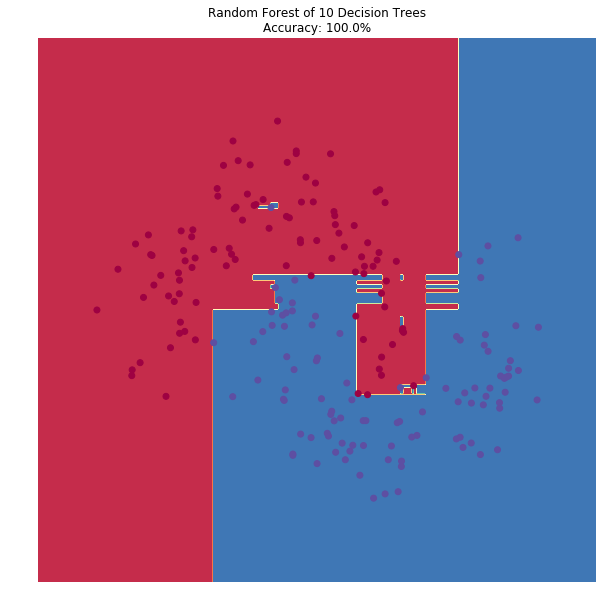

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=0.20)

random_forest = RandomForest().fit(X, y)

utils.plot_decision_boundary(
    title='Random Forest of 10 Decision Trees\nAccuracy: %.1f%%' 
        % (100 * accuracy(y, random_forest.predict(X))),
    figsize=(10, 10),
    func=lambda x: random_forest.predict(x),
    X=X,
    y=y
)

## Real-life Data Test

The [sonar.all-data.csv](sonar.all-data.csv) was obtained from [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29).

It contains 208 observations and 60 input variables that describe the stength of the sonar return signal at different angles. The objective is to differentiate rocks **'R'** from metal cylinders (mines) **'M'**, i.e. it is a *binary classification* problem - predict 1 if it's a mine and 0 otherwise.

In [5]:
data = pd.read_csv(
    'sonar.all-data.csv',
    header=None
)

In [6]:
X = data.loc[:, :59].values
y = data[60].apply(
    lambda val: 1 if val == 'M' else 0
).values

### Test scores

Using a 10-fold cross-validation.

In [9]:
f1_scores, accuracy_scores = [], []

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for train_idx, test_idx in KFold(n_splits=10).split(X):
        random_forest = RandomForest(
            sample_ratio=0.3
        ).fit(X[train_idx], y[train_idx])
        predictions = random_forest.predict(X[test_idx])

        f1_scores.append(f1_score(y[test_idx], predictions))
        accuracy_scores.append(accuracy(y[test_idx], predictions))

    print("Average F1 score: %.2f (%.2f)" % (np.mean(f1_scores), np.std(f1_scores)))    
    print("Average accuracy: %.2f (%.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))

Average F1 score: 0.39 (0.33)
Average accuracy: 0.59 (0.18)


### Comparison with Sklearn

Using [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [8]:
f1_scores, accuracy_scores = [], []

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    for train_idx, test_idx in KFold(n_splits=10).split(X):
        skl_random_forest = RandomForestClassifier(
            max_depth=10,
        )
        skl_random_forest.fit(X[train_idx], y[train_idx])
        predictions = skl_random_forest.predict(X[test_idx])

        f1_scores.append(f1_score(y[test_idx], predictions))
        accuracy_scores.append(accuracy(y[test_idx], predictions))

    print("Average F1 score: %.2f (%.2f)" % (np.mean(f1_scores), np.std(f1_scores)))    
    print("Average accuracy: %.2f (%.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))

Average F1 score: 0.40 (0.34)
Average accuracy: 0.63 (0.17)
